# <font color= blue>Car Price Prediction For 'Geely Auto' using LR</font>
___By: Divyam Kumar___
- __Business Objective:__
    We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables.
- __Goals:__ 
    1. Which variables are significant in predicting the price of a car
    2. How well those variables describe the price of a car
- __Data Sourcing:__
    We have taken the data from <font color=brown>__https://archive.ics.uci.edu/ml/datasets/Automobile__</font>
    along with the data dictionary.

## STEP 1 : Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Read the data
carprice = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
carprice.shape

(205, 26)

In [5]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Using basic __Visualisation__ we will ensure for whether we can apply a __Linear Regression model or not__.
We will check for the __Multicolliniarity__ as well.

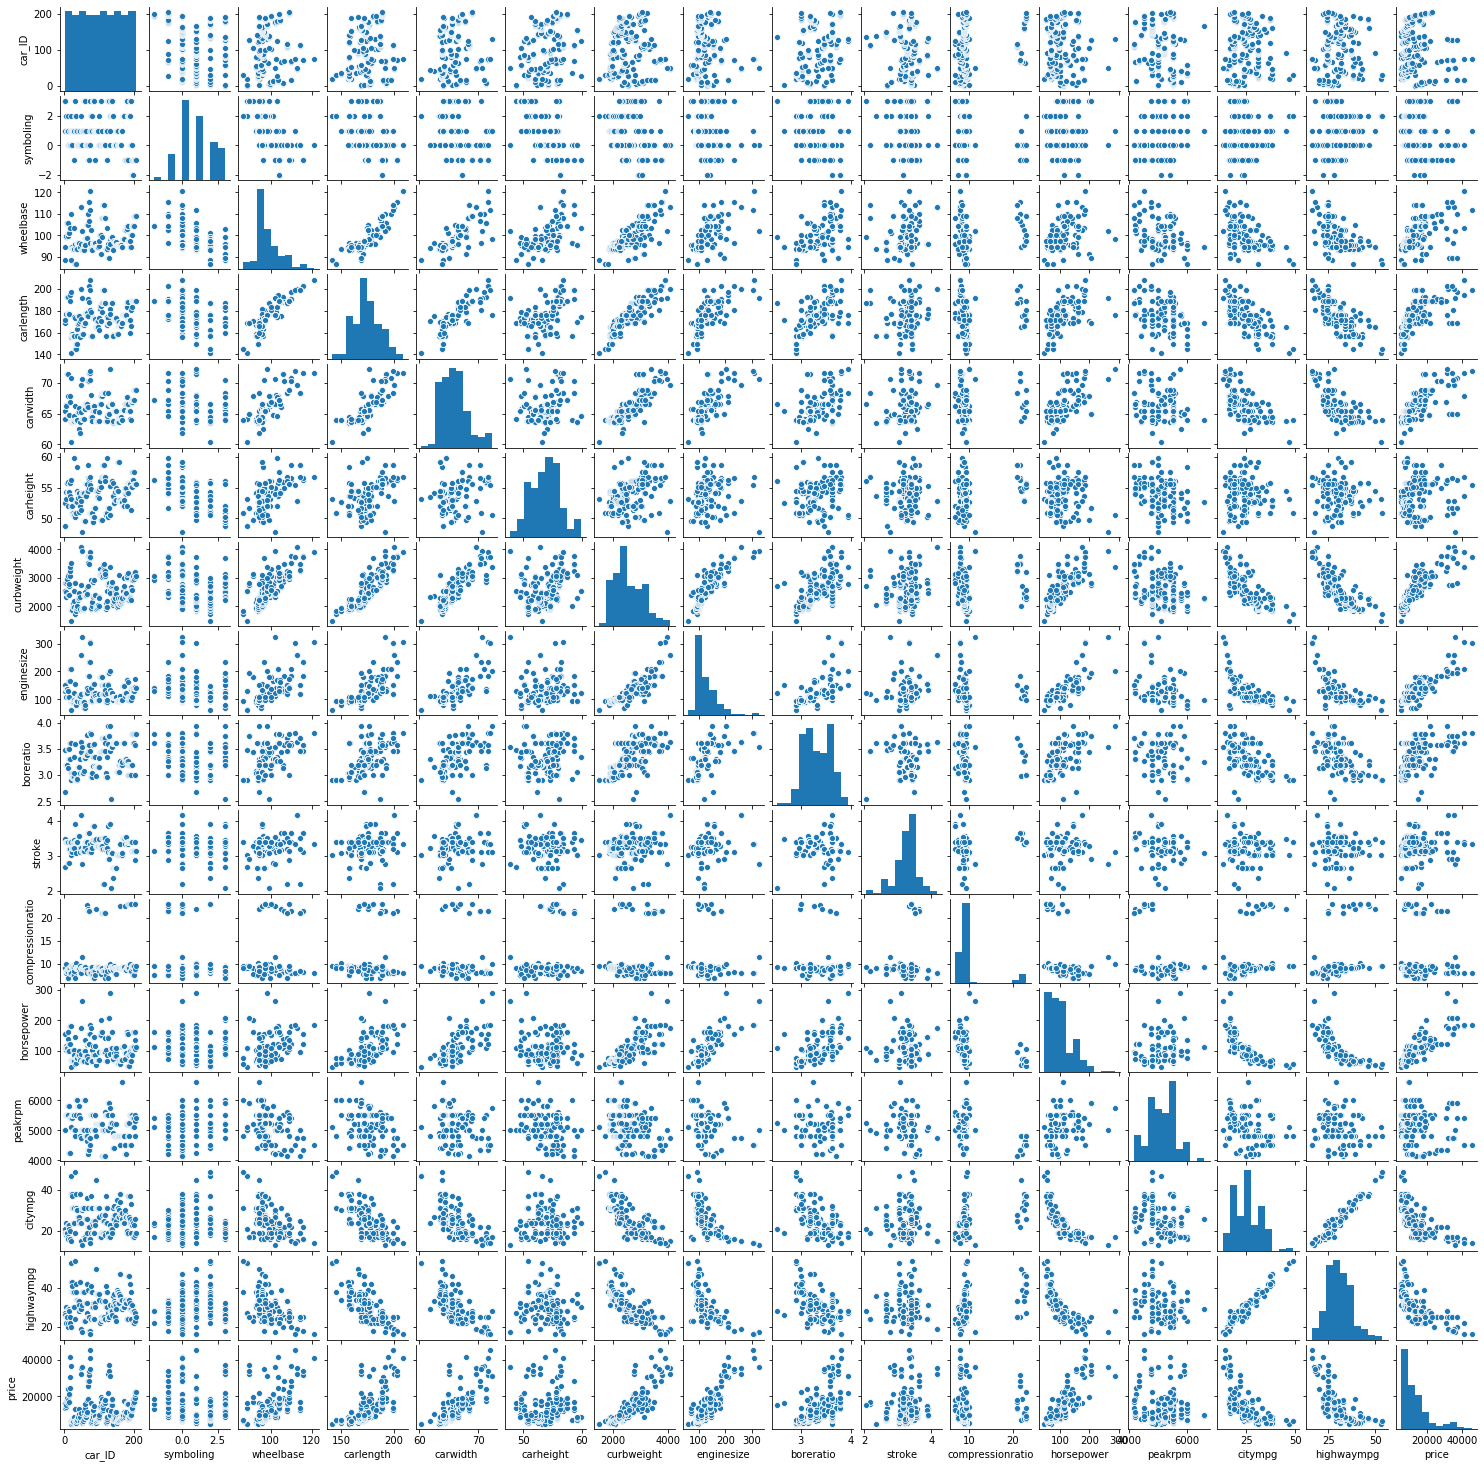

In [7]:
# Visualising the numeric variable
plot = sns.pairplot(carprice)
plot.fig.set_size_inches(20,20)
plt.show()

Clearly from the plot above we can see that there are some linear relationship between the column __carlength__, __carwidth__, __curbweight__, __enginesize__. So, we can apply LR model in this case.

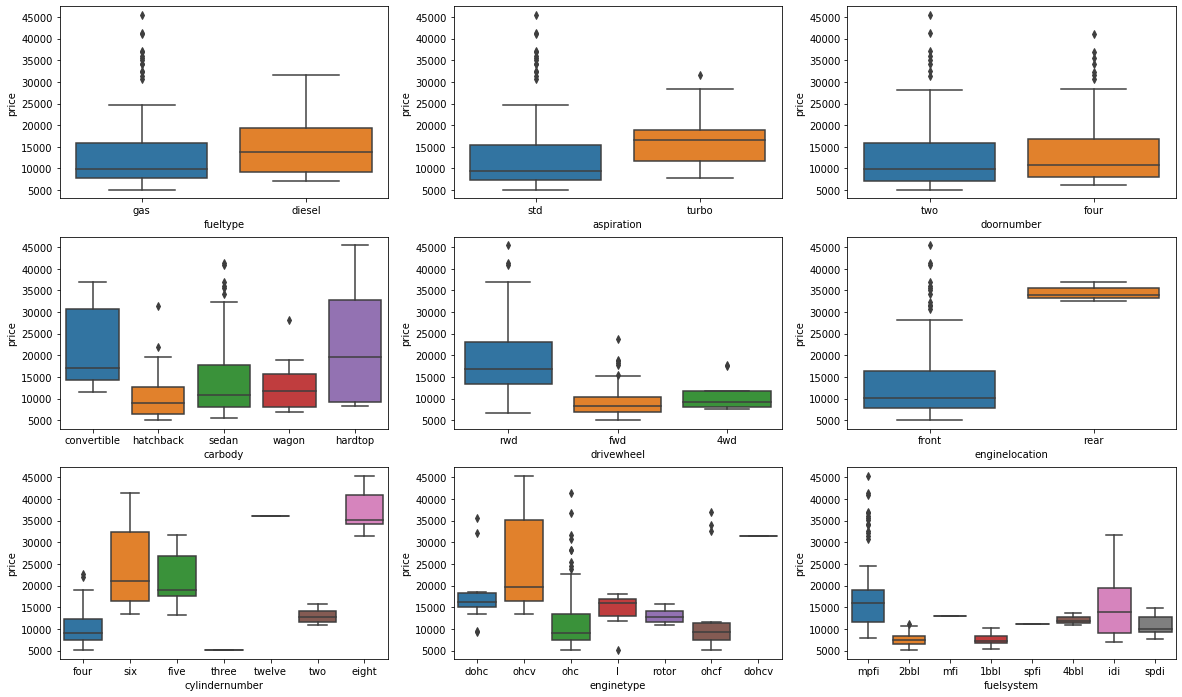

In [8]:
# Visualising the categorical variable
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(3,3,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(3,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.show()

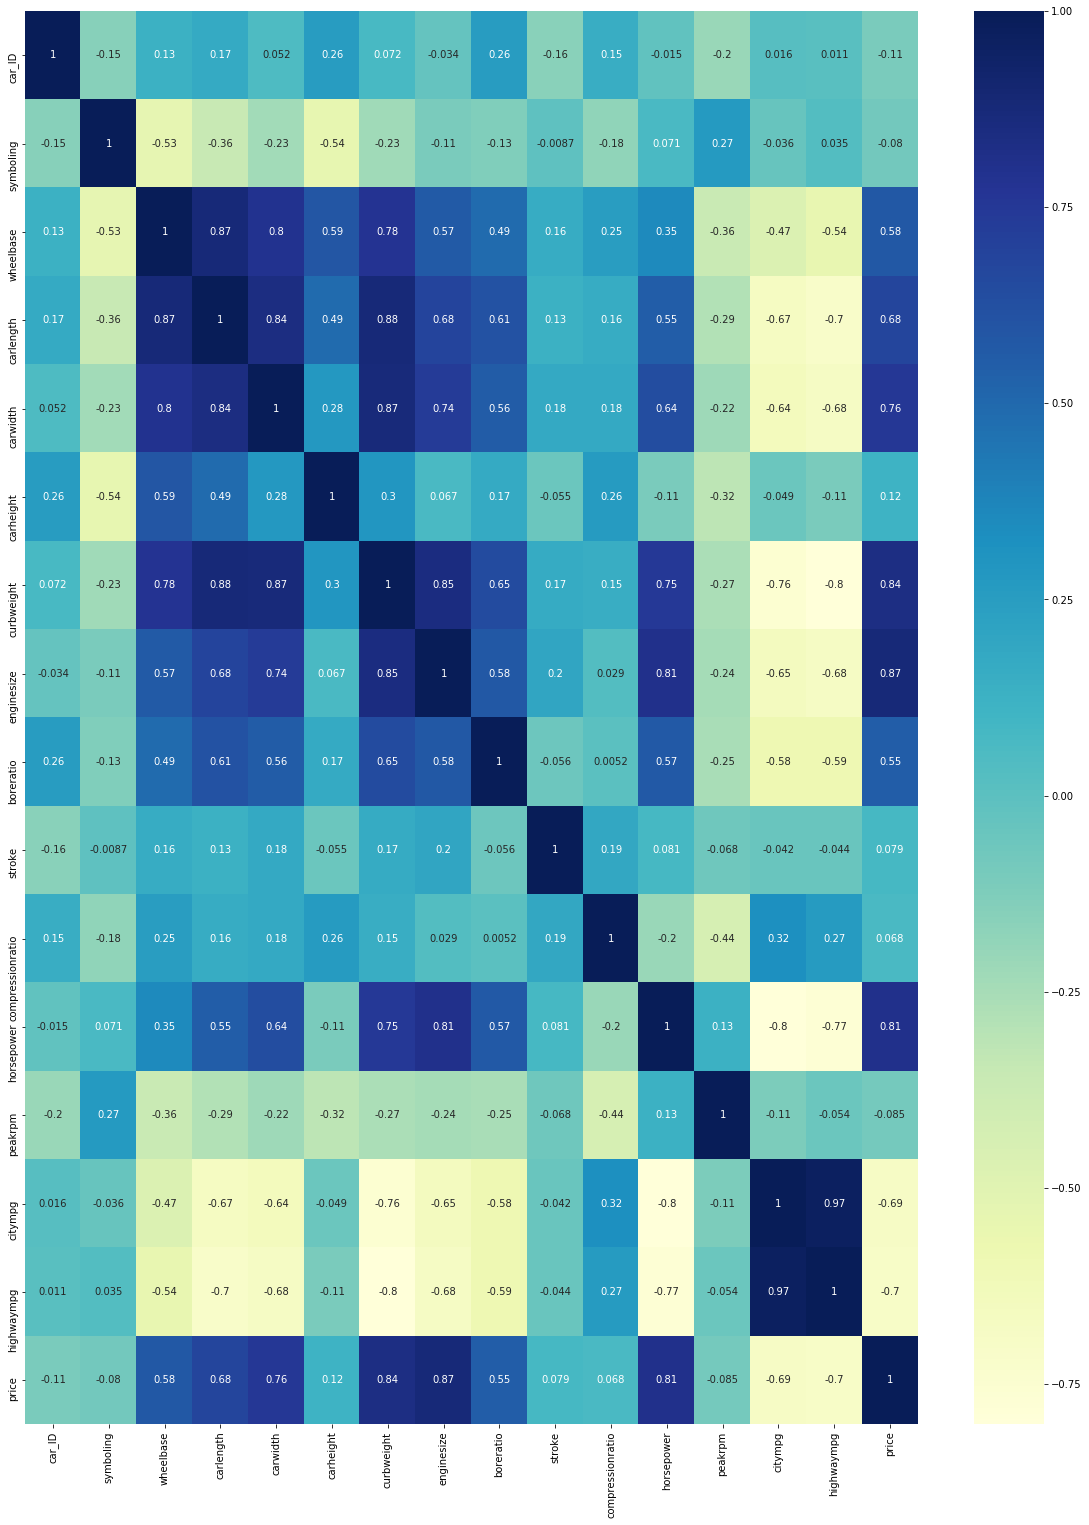

In [9]:
# We can plot the heatmap to see the correlation between the variables
plt.figure(figsize = (20, 26))
sns.heatmap(carprice.corr(), cmap="YlGnBu", annot = True)
plt.show()

From the above correlation plot we see that there are some variables that are highly correlated while some have negative correlation values.
As we are predicting the price here, lets see how price correlates with the other variables
__Observations:__
- price is negatively correlated with symboling, peakrpm, citympg and highwaympg.
- price has a very low correlation with carheight, stroke and compressionratio.
- price shows a decent correlation with wheelbase, carlength, boreratio.
- price is highly correlated to carwidth, crubweight, enginesize and horsepower.

## STEP 2 : Preparing the Data

In [10]:
# Dropping car_ID as it's not required for the analysis
carprice = carprice.drop('car_ID', axis =1)
carprice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


There is a variable named __CarName__ which is comprised of two parts - the first word is the name of __'car company'__ and the second is the __'car model'__. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only __company name__ as the independent variable for model building. 

In [11]:
# Extract the 'company name' from the 'CarName' column & create new column for the same.
carprice['CompanyName'] = carprice['CarName'].str.split().str[0]

In [12]:
carprice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [13]:
# Now as we have extracted the Comapny Name from CarName, we do not require the car name columns for further analysis.
# Lets go ahead and drop the variable.

carprice = carprice.drop('CarName', axis = 1)

# Lets look at the data again
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [14]:
# Check the unique values of the CompanyName
carprice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

As we see above there are company names which are same but with different spellings and some with abbreviations. Taking the values from the above list , lets create the corrected list and replace these values.

alfa-romero - Alfa Romeo
maxda - Mazda
nissan - Nissan
porcshce - Porsche
toyouta - Toyota
vokswagen - Volkswagen
vw - Volkswagen

In [15]:
carprice['CompanyName'] = carprice['CompanyName'].replace(['alfa-romero'], 'alfa-romeo')
carprice['CompanyName'] = carprice['CompanyName'].replace(['maxda', 'Mazda'], 'mazda')
carprice['CompanyName'] = carprice['CompanyName'].replace(['Nissan'], 'nissan')
carprice['CompanyName'] = carprice['CompanyName'].replace(['porcshce'], 'porsche')
carprice['CompanyName'] = carprice['CompanyName'].replace(['toyouta'], 'toyota')
carprice['CompanyName'] = carprice['CompanyName'].replace(['volkswagen', 'vokswagen', 'vw'], 'volkswagen')

#Now lets check the unique values in 'Comapny Name' again
carprice['CompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [17]:
# Let's see the unique values associated with the categorical variables
# unique values for fueltype
print("Unique values in fueltype")
print(carprice['fueltype'].unique())

# unique values for aspiration
print("Unique values in aspiration")
print(carprice['aspiration'].unique())

# unique values for doornumber
print("Unique values in doornumber")
print(carprice['doornumber'].unique())

# unique values for carbody
print("Unique values in carbody")
print(carprice['carbody'].unique())

# unique values for drivewheel
print("Unique values in drivewheel")
print(carprice['drivewheel'].unique())

# unique values for enginelocation
print("Unique values in enginelocation")
print(carprice['enginelocation'].unique())

# unique values for enginetype
print("Unique values in enginetype")
print(carprice['enginetype'].unique())

# unique values for cylindernumber
print("Unique values in cylindernumber")
print(carprice['cylindernumber'].unique())

# unique values for fuelsystem
print("Unique values in fuelsystem")
print(carprice['fuelsystem'].unique())

Unique values in fueltype
['gas' 'diesel']
Unique values in aspiration
['std' 'turbo']
Unique values in doornumber
['two' 'four']
Unique values in carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique values in drivewheel
['rwd' 'fwd' '4wd']
Unique values in enginelocation
['front' 'rear']
Unique values in enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique values in cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Unique values in fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


__Encoding :__
- Convert binary variables into 1/0
- Convert the categorical variables into dummy variables 

In [18]:
# Convert binary variables into 1/0 
carprice['fueltype'] = carprice['fueltype'].map({'diesel':0, 'gas':1})
carprice['aspiration'] = carprice['aspiration'].map({'turbo':0, 'std':1})
carprice['doornumber'] = carprice['doornumber'].map({'two':0, 'four':1})
carprice['enginelocation'] = carprice['enginelocation'].map({'rear':0, 'front':1})

In [19]:
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,1,1,0,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,1,1,0,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,1,1,0,hatchback,rwd,1,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,1,1,1,sedan,fwd,1,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,4wd,1,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [20]:
# Creating dummy variables for the columns = ['drivewheel', 'carbody','enginetype', 'cylindernumber', 'fuelsystem']
carprice = pd.get_dummies(carprice, columns=['drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem'])
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [21]:
# Now as we did not use the default drop_first option in get_dummies above,
# lets go ahead and drop that dummy variabe which are least related to price

# for carbody variable, from EDA - the category hatchback seems to be the least related to price.
carprice.drop(labels = ['carbody_hatchback'], axis = 1, inplace = True)

# for fuelsystem variable, from EDA - the category '1bbl' seems to be the least related to price.
carprice.drop(labels = ['fuelsystem_1bbl'], axis = 1, inplace = True)

# the reason we are dropping 'drivewheel_4wd' from the drive wheel category 
# (though it looks like it is the most common preffered) is that it has a reducing effect on the price.
carprice.drop(labels = ['drivewheel_4wd'], axis = 1, inplace = True)

# engine type rotor category has the least effect on the price. Lets drop it.
carprice.drop(labels = ['enginetype_rotor'], axis = 1, inplace = True)

# cylindernumber_three category has the least effect on the price. Lets drop it.
carprice.drop(labels = ['cylindernumber_three'], axis = 1, inplace = True)

# Now lets again look at the shape of the dataset and the number of variables we have - 
print(carprice.columns)
print(carprice.shape)

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CompanyName',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_convertible',
       'carbody_hardtop', 'carbody_sedan', 'carbody_wagon', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')
(205, 45)


In [22]:
# Lets check the range for the car price
carprice.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [23]:
# Let's see how we can normalize the CompanyName now
# Lets see the CompanyName column for creating some bins
car_category = carprice.groupby(['CompanyName']).median()
car_category['price'].sort_values()

CompanyName
chevrolet      6295.0
honda          7295.0
dodge          7609.0
plymouth       7609.0
subaru         7894.0
nissan         8124.0
mitsubishi     8499.0
isuzu          8916.5
toyota         9103.0
renault        9595.0
volkswagen     9737.5
mazda         10595.0
saab          15275.0
alfa-romeo    16500.0
mercury       16503.0
peugeot       16630.0
audi          17710.0
volvo         18420.0
bmw           22835.0
porsche       32528.0
buick         32892.0
jaguar        35550.0
Name: price, dtype: float64

In [24]:
CarLabels = ['EconomicCars', 'MidTierCars', 'LuxuryCars']
bins = [0, 10000, 20000, 50000]

car_category = car_category[['price']].join(pd.get_dummies(pd.cut(car_category.price, bins, labels=CarLabels)))
car_category

,price,EconomicCars,MidTierCars,LuxuryCars
CompanyName,,,,
alfa-romeo,16500.0,0,1,0
audi,17710.0,0,1,0
bmw,22835.0,0,0,1
buick,32892.0,0,0,1
chevrolet,6295.0,1,0,0
dodge,7609.0,1,0,0
honda,7295.0,1,0,0
isuzu,8916.5,1,0,0
jaguar,35550.0,0,0,1


In [25]:
# From the above grouping we have divided our car companies into 'EconomicCars', 'MidTierCars', 'LuxuryCars' categories.
# Lets integrate these categories into our main dataframe.

# Initially lets default the values to 0. We will only deal with 2 columns.

luxuryCars = ['bmw', 'buick', 'jaguar', 'porsche']


def mapCarCompanyToLuxuryCategory(carCompanies):
    val = 0
    if carCompanies in luxuryCars:
        val = 1
    else:
        val = 0
        
    return int(val)


carprice['LuxuryCars'] = 0
carprice['LuxuryCars'] = carprice['CompanyName'].apply(mapCarCompanyToLuxuryCategory)

In [26]:

midTierCars = ['alfa-romeo', 'audi', 'mazda', 'mercury', 'peugeot', 'saab', 'volvo']
def mapCarCompanyToMidTierCategory(carCompanies1):
    retval = 0
    if carCompanies1 in midTierCars:
        retval = 1
    else:
        retval = 0
    return int(retval)

carprice['MidTierCars'] = 0
carprice['MidTierCars'] = carprice['CompanyName'].apply(mapCarCompanyToMidTierCategory) 

# Lets look at the dataframe again
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,1,0,0,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,1,0,0,0,1
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,1,0,0,0,1


In [27]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   fueltype               205 non-null    int64  
 2   aspiration             205 non-null    int64  
 3   doornumber             205 non-null    int64  
 4   enginelocation         205 non-null    int64  
 5   wheelbase              205 non-null    float64
 6   carlength              205 non-null    float64
 7   carwidth               205 non-null    float64
 8   carheight              205 non-null    float64
 9   curbweight             205 non-null    int64  
 10  enginesize             205 non-null    int64  
 11  boreratio              205 non-null    float64
 12  stroke                 205 non-null    float64
 13  compressionratio       205 non-null    float64
 14  horsepower             205 non-null    int64  
 15  peakrp

In [28]:
# Now as we have categorized the car companies into Economic, MidTies and Luxury cars,
# we can safely drop the 'CompanyName' column.
carprice.drop(labels=['CompanyName'], axis = 1, inplace=True)
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,1,0,0,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,1,0,0,0,1
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,1,0,0,0,1


In [29]:
# Dealing with the 'Symboling' variable
# From the data dictionary we know - Its assigned insurance risk rating, A value of +3 indicates 
# that the auto is risky, -3 that it is probably prety safe.
# So this can be categorized into 3 categories such as - 'HighRisk' - (-3, -2), 'ModerateRisk' - (-1, 0, 1), 'LowRisk' - (2, 3)

SymbolingLabels = ['LowRisk', 'ModerateRisk', 'HighRisk']
bins = [-3, -2, 2, 3]

carprice = carprice.join(pd.get_dummies(pd.cut(carprice['symboling'], bins, labels=SymbolingLabels)))
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk,HighRisk
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,1,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,1,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,0,1,0,1,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,1,0,0,0,1,0,1,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,1,0,0,0,1,0,1,0


In [30]:
# Now we can safely drop one of the risk based dummy variables created above. We will go ahead and drop the 'HighRisk' variable

carprice.drop(labels=['HighRisk'], axis = 1, inplace = True)
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,1,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,1,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,1,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,1,0,0,0,1,0,1
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,1,0,0,0,1,0,1


In [31]:
# Now as we have categorized symboling into LowRisk, HighRisk and ModerateRisk categories, 
# we can safely drop the symboling column.

carprice.drop(labels=['symboling'], axis = 1, inplace = True)
carprice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,1,0,0,0,1,0,0
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,1,0,0,0,1,0,1
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,1,0,0,0,1,0,1


Dealing with __Multicolliniarity__
From the correlation heatmap following things could be observed

1. carlength is highly correlated with carwidth. (corr = 0.84)
2. carlength is highly correlated with wheelbase. (corr = 0.87)
3. carwidth is highly correlated with crubweight. (corr = 0.87)
4. crubweight is highly correlated with horsepower. (corr = 0.75)
5. horsepower is highly correlated with enginesize. (corr = 0.81)
6. highwaympg is highly correlated with citympg. (corr = 0.97)

We have to reduce this multicolinearity among the variables to get an accurate model. We can safely drop some of these columns leaving the columns that is strongly correlated to 'price'.

We will be dropping columns ['carwidth', 'carlength', 'highwaympg', 'citympg']. The reason for dropping 'carwidth', 'carlength' is that these two variables are strongly correlated to 'curbweight'. But as 'curbweight' is more highly correlated to price, we will keep it and drop 'carwidth', 'carlength'.

The reason for dropping 'highwaympg', 'citympg' is that they both are very highly correlated to each other but have a very low correlation with price.

We will keep the other variables for time being as they show a very strong correlation with price.

In [32]:
carprice.drop(labels=['carwidth', 'carlength', 'highwaympg', 'citympg'], axis = 1, inplace=True)

# lets have a look at the final data before proceeding with the model building.
carprice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
0,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,0,0,1,0,0
2,1,1,0,1,94.5,52.4,2823,152,2.68,3.47,...,0,0,0,1,0,0,0,1,0,1
3,1,1,1,1,99.8,54.3,2337,109,3.19,3.40,...,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,99.4,54.3,2824,136,3.19,3.40,...,0,0,0,1,0,0,0,1,0,1


__Splitting__ into __train__ and __test__ data sets

In [33]:
df_train, df_test = train_test_split(carprice, train_size = 0.70, test_size = 0.30, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(143, 43)
(62, 43)


__Rescaling the features__:
- We can use either __normalization__(MinMax scaling) or __standardisation__
- We will choose __MinMax scaling__ as of now

In [34]:
# Instantiate an object
scaler = MinMaxScaler()

In [35]:
# create a list of numeric variables to be scaled
num_vars =['wheelbase','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price']

In [36]:
# Fit on the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.559441,0.993007,0.411141,0.509004,0.407878,0.241351,0.497946,0.535389,...,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.118881,0.265734,0.013986,0.860140
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.215378,0.211269,0.154619,0.207140,0.157843,...,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.324786,0.443276,0.117845,0.348061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.353982,0.245539,0.135849,0.305556,0.464646,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,0.341379,0.522124,0.355702,0.184906,0.500000,0.545455,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.668142,0.559542,0.301887,0.682540,0.611111,...,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


## STEP 3 : Training the Model

In [37]:
# Let us use some user defined function for code reusability purpose as defined below for :
# applying the statsmodels and calculating the VIF

def applyStatsModel(data):
    # Adding a constant variable 
    X_train_linear_model = sm.add_constant(data)
    
    # Run the linear model
    linear_model = sm.OLS(y_train, X_train_linear_model).fit() 
    
    return linear_model

def calculateVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    
    # Calculate the vif factors for all the features.
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [38]:
# Specify the X_train and y_train
y_train = df_train.pop('price')
X_train = df_train

In [39]:
# We are using RFE instead of mannually eliminating the features as we have large number of features.
# Running RFE with the o/p number of variable as 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train, rfe.support_, rfe.ranking_))

[('fueltype', False, 9),
 ('aspiration', False, 11),
 ('doornumber', False, 25),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 5),
 ('drivewheel_fwd', False, 19),
 ('drivewheel_rwd', False, 18),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 16),
 ('carbody_sedan', False, 20),
 ('carbody_wagon', False, 26),
 ('enginetype_dohc', False, 21),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', False, 3),
 ('enginetype_ohcf', False, 6),
 ('enginetype_ohcv', False, 12),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 2),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 22),
 ('fuelsystem_2bbl', False, 24),
 ('fuelsystem_4bbl', Fal

In [40]:
# Lets see the columns that RFE supports
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'carbody_convertible',
       'enginetype_dohcv', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'LuxuryCars'],
      dtype='object')

In [41]:
# Lets see the variables the are rejected by RFE
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carheight', 'peakrpm',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'MidTierCars', 'LowRisk',
       'ModerateRisk'],
      dtype='object')

We will use __statsmodels__ over the variables got after performing RFE for model building further and to get the detailed statistics.

## Model 1

In [42]:
# let's use all the columns supported by RFE
X_train_1 = X_train[col]

# Run the linear model
stats_model_1 = applyStatsModel(X_train_1)

#Let's see the summary of the linear model built above
print(stats_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     118.3
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           5.95e-67
Time:                        00:28:01   Log-Likelihood:                 210.47
No. Observations:                 143   AIC:                            -388.9
Df Residuals:                     127   BIC:                            -341.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [43]:
# Calculate the VIFs for new model
vif_val_1 = calculateVIF(X_train_1)

# Let's see the vif values
vif_val_1

,Features,VIF
2,curbweight,70.75
3,enginesize,66.63
0,enginelocation,41.82
5,stroke,30.20
7,horsepower,26.77
1,wheelbase,25.98
4,boreratio,25.92
11,cylindernumber_four,11.38
12,cylindernumber_six,5.97
13,cylindernumber_twelve,4.24


We will look at the statistical significance of the variables after looking at the p-vaue and the VIF related to it for analysing which variable to drop.
We could have following possibilities:
- High p-value, High VIF : Drop it
- High - Low :
    - High p-value, Low VIF : Remove these first
    - Low p-value, High VIF : Remove these after the above option
- Low p-value, Low VIF : Keep it

__Observations__ from __Model 1__:
- __enginesize__ is having __high VIF__ as well as __high p-value__. So, Let's __drop__ this first and build the next model.

## Model 2

In [44]:
X_train_2 = X_train_1.drop(["enginesize"], axis = 1)

In [45]:
# Run the linear model
stats_model_2 = applyStatsModel(X_train_2)

#Let's see the summary of the linear model built above
print(stats_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     127.6
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           5.78e-68
Time:                        00:28:02   Log-Likelihood:                 210.34
No. Observations:                 143   AIC:                            -390.7
Df Residuals:                     128   BIC:                            -346.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [46]:
# Calculate the VIFs again for the new model
vif_val_2 = calculateVIF(X_train_2)

# Let's see the vif values
vif_val_2

,Features,VIF
2,curbweight,61.95
0,enginelocation,32.31
6,horsepower,26.75
1,wheelbase,25.82
3,boreratio,20.20
4,stroke,19.59
10,cylindernumber_four,11.08
11,cylindernumber_six,3.07
5,compressionratio,2.83
9,cylindernumber_eight,2.40


__Observations__ from __Model 2__:
- __stroke__ is having __high VIF__ as well as __high p-value__. So, Let's __drop__ this feature and build the next model.

## Model 3

In [47]:
X_train_3 = X_train_2.drop(["stroke"], axis = 1)

In [48]:
# Run the linear model
stats_model_3 = applyStatsModel(X_train_3)

#Let's see the summary of the linear model built above
print(stats_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     138.2
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           5.27e-69
Time:                        00:28:02   Log-Likelihood:                 210.24
No. Observations:                 143   AIC:                            -392.5
Df Residuals:                     129   BIC:                            -351.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [49]:
# Calculate the VIFs again for the new model
vif_val_3 = calculateVIF(X_train_3)

# Let's see the vif values
vif_val_3

,Features,VIF
2,curbweight,60.91
1,wheelbase,25.78
5,horsepower,24.12
0,enginelocation,20.45
3,boreratio,15.91
9,cylindernumber_four,10.67
10,cylindernumber_six,2.97
4,compressionratio,2.61
8,cylindernumber_eight,2.33
7,enginetype_dohcv,2.29


__Observations__ from __Model 3__:
- __boreratio__ is having __high VIF__ as well as __high p-value__. So, Let's __drop__ this feature and build the next model.

## Model 4

In [50]:
X_train_4 = X_train_3.drop(["boreratio"], axis = 1)

In [51]:
# Run the linear model
stats_model_4 = applyStatsModel(X_train_4)

#Let's see the summary of the linear model built above
print(stats_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     150.6
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           4.70e-70
Time:                        00:28:02   Log-Likelihood:                 210.11
No. Observations:                 143   AIC:                            -394.2
Df Residuals:                     130   BIC:                            -355.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [52]:
# Calculate the VIFs again for the new model
vif_val_4 = calculateVIF(X_train_4)

# Let's see the vif values
vif_val_4

,Features,VIF
2,curbweight,57.24
1,wheelbase,25.76
4,horsepower,22.43
0,enginelocation,20.38
8,cylindernumber_four,8.91
9,cylindernumber_six,2.85
3,compressionratio,2.60
6,enginetype_dohcv,2.28
7,cylindernumber_eight,2.25
11,LuxuryCars,2.09


__Observations__ from __Model 4__:
- __cylindernumber_twelve__ is having __low VIF__ and __high p-value__. So, Let's __drop__ this feature and build the next model.

## Model 5

In [53]:
X_train_5 = X_train_4.drop(["cylindernumber_twelve"], axis = 1)

In [54]:
# Run the linear model
stats_model_5 = applyStatsModel(X_train_5)

#Let's see the summary of the linear model built above
print(stats_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     164.3
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           5.65e-71
Time:                        00:28:03   Log-Likelihood:                 209.60
No. Observations:                 143   AIC:                            -395.2
Df Residuals:                     131   BIC:                            -359.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1610 

In [55]:
# Calculate the VIFs again for the new model
vif_val_5 = calculateVIF(X_train_5)

# Let's see the vif values
vif_val_5

,Features,VIF
2,curbweight,56.96
1,wheelbase,25.61
0,enginelocation,20.36
4,horsepower,19.62
8,cylindernumber_four,8.85
3,compressionratio,2.54
9,cylindernumber_six,2.44
7,cylindernumber_eight,2.21
6,enginetype_dohcv,2.17
10,LuxuryCars,2.04


__Observations__ from __Model 5__:
- __cylindernumber_six__ is having __low VIF__ and __high p-value__. So, Let's __drop__ this feature and build the next model.

## Model 6

In [56]:
X_train_6 = X_train_5.drop(["cylindernumber_six"], axis = 1)

In [57]:
# Run the linear model
stats_model_6 = applyStatsModel(X_train_6)

#Let's see the summary of the linear model built above
print(stats_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     180.8
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           6.43e-72
Time:                        00:28:03   Log-Likelihood:                 209.11
No. Observations:                 143   AIC:                            -396.2
Df Residuals:                     132   BIC:                            -363.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1479 

In [58]:
# Calculate the VIFs again for the new model
vif_val_6 = calculateVIF(X_train_6)

# Let's see the vif values
vif_val_6

,Features,VIF
2,curbweight,56.89
1,wheelbase,25.58
0,enginelocation,19.12
4,horsepower,18.74
8,cylindernumber_four,7.03
3,compressionratio,2.54
6,enginetype_dohcv,2.15
7,cylindernumber_eight,2.06
9,LuxuryCars,2.02
5,carbody_convertible,1.47


__Observations__ from __Model 6__:
- __cylindernumber_eight__ is having __low VIF__ and __high p-value__. So, Let's __drop__ this feature and build the next model.

## Model 7

In [59]:
X_train_7 = X_train_6.drop(["cylindernumber_eight"], axis = 1)

In [60]:
# Run the linear model
stats_model_7 = applyStatsModel(X_train_7)

#Let's see the summary of the linear model built above
print(stats_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     198.5
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           1.47e-72
Time:                        00:28:04   Log-Likelihood:                 207.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     133   BIC:                            -366.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1480    

In [61]:
# Calculate the VIFs again for the new model
vif_val_7 = calculateVIF(X_train_7)

# Let's see the vif values
vif_val_7

,Features,VIF
2,curbweight,56.00
1,wheelbase,25.58
0,enginelocation,19.08
4,horsepower,18.11
7,cylindernumber_four,6.97
3,compressionratio,2.44
8,LuxuryCars,1.89
6,enginetype_dohcv,1.41
5,carbody_convertible,1.34


__Observations__ from __Model 7__:
- __curbweight__ is having __high VIF__ and __high p-value__. So, Let's __drop__ this feature and build the next model.

## Model 8

In [62]:
X_train_8 = X_train_7.drop(["curbweight"], axis = 1)

In [63]:
# Run the linear model
stats_model_8 = applyStatsModel(X_train_8)

#Let's see the summary of the linear model built above
print(stats_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     218.4
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           5.89e-73
Time:                        00:28:04   Log-Likelihood:                 205.84
No. Observations:                 143   AIC:                            -393.7
Df Residuals:                     134   BIC:                            -367.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1297    

In [64]:
# Calculate the VIFs again for the new model
vif_val_8 = calculateVIF(X_train_8)

# Let's see the vif values
vif_val_8

,Features,VIF
0,enginelocation,19.08
1,wheelbase,8.91
3,horsepower,6.96
6,cylindernumber_four,6.96
2,compressionratio,2.13
7,LuxuryCars,1.88
5,enginetype_dohcv,1.28
4,carbody_convertible,1.12


__Observations__ from __Model 8__:
- __enginelocation__ is having __high VIF__. So, Let's __drop__ this feature and build the next model.

## Model 9

In [65]:
X_train_9 = X_train_8.drop(["enginelocation"], axis = 1)

In [66]:
# Run the linear model
X_train_linear_model = sm.add_constant(X_train_9)
linear_model = sm.OLS(y_train, X_train_linear_model).fit()

#Let's see the summary of the linear model built above
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     238.3
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           1.02e-72
Time:                        00:28:05   Log-Likelihood:                 202.28
No. Observations:                 143   AIC:                            -388.6
Df Residuals:                     135   BIC:                            -364.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0426    

In [67]:
# Calculate the VIFs again for the new model
vif_val_9 = calculateVIF(X_train_9)

# Let's see the vif values
vif_val_9

,Features,VIF
0,wheelbase,7.42
2,horsepower,4.98
5,cylindernumber_four,2.44
1,compressionratio,2.09
6,LuxuryCars,1.87
4,enginetype_dohcv,1.27
3,carbody_convertible,1.11


__Observations__ from __Model 9__:
- Now we have the model with all the features having a good VIF that is __VIF < 10__ and also the p-values are pretty good that is __p-value < 0.05__ for all the features.
- Also we have a good __r-squared__ and the __adjusted r-squared__ i.e around __92.5%__ and __92.1%__ with a minute gap among themselves.
So, We can choose this __Model 9__ for further analysis of residuals.

## STEP 4 : Residual Analysis - on training set

So, now to check if the __error terms are also normally distributed__ (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [68]:
X_train_linear_model.columns

Index(['const', 'wheelbase', 'compressionratio', 'horsepower',
       'carbody_convertible', 'enginetype_dohcv', 'cylindernumber_four',
       'LuxuryCars'],
      dtype='object')

Text(0.5, 0, 'Errors')

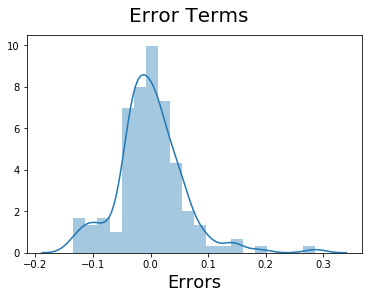

In [69]:
y_train_predict = linear_model.predict(X_train_linear_model)
res = y_train - y_train_predict

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

We can clearly see from the distribution plot of error terms that the __error terms are normally distributed__

## STEP 5 : Prediction and Evaluation of the model on the test set

We need to perform the rescaling on test set as well but we only transform never fit on the test data set

In [70]:
# create a list of numeric variables to be scaled
num_vars =['wheelbase','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [71]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,0.564516,0.967742,0.437764,0.559663,0.428470,0.265673,0.556580,0.544314,...,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.112903,0.290323,0.016129,0.838710
std,0.319058,0.385142,0.499868,0.178127,0.212861,0.215811,0.179488,0.162820,0.228484,0.160738,...,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.319058,0.457617,0.127000,0.370801
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.141593,0.128394,0.067925,-0.111111,-0.060606,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.313793,0.384956,0.305275,0.177358,0.404762,0.484848,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,0.387931,0.588496,0.406129,0.226415,0.563492,0.585859,...,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.570690,0.699115,0.564876,0.316038,0.746032,0.641414,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.182759,1.061947,0.935609,0.932075,0.888889,0.863636,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
y_test = df_test.pop('price')
X_test = df_test

In [73]:
X_test_sm = X_test[X_train_9.columns]

# Adding a constant variable 
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,wheelbase,compressionratio,horsepower,carbody_convertible,enginetype_dohcv,cylindernumber_four,LuxuryCars
160,1.0,0.313793,0.12500,0.091667,0,0,1,0
186,1.0,0.368966,0.12500,0.154167,0,0,1,0
59,1.0,0.420690,0.10000,0.150000,0,0,1,0
165,1.0,0.272414,0.15000,0.266667,0,0,1,0
140,1.0,0.231034,0.10625,0.104167,0,0,1,0


In [74]:
# Making predictions
y_test_pred = linear_model.predict(X_test_sm)

In [75]:
# Evaluating the model on the test data set
r2_score(y_true = y_test, y_pred = y_test_pred)

0.9118400136565586

## Conclusion

From the final model, we have all our variables in the permissible limits and the model looks to be stable as evident from the test data set as well where we have __91.18%__ r-squared which is very close to the __92.5%__ r-squared on the training data set. Also the error terms are normally distributed. Overall the model looks good.

Our deciding feature would be -

1. wheelbase    
2. horsepower    
3. cylindernumber_four
4. LuxuryCars
5. carbody_convertible
6. compressionratio
7. enginetype_dohcv

The final equation of the for our best fitted line for predicting price would be -

__price = (0.2621 x wheelbase) + (0.0911 x compressionratio) + (-0.2239 x enginetype_dohcv) + (0.6131 x horsepower) + (-0.0488 x cylindernumber_four) + (0.2557 x LuxuryCars) + (0.1684 x carbody_convertible) - 0.0426__